# **Project 3: Hamburger/Hotdog**


## **Import the necessary libraries**

In [3]:
from PIL import Image
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


# scikit-learn modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Library for randomly selecting data points
import random

from Utils import plot_training_history, evaluate_model, plot_confusion_matrix

## **Load and Prepare the Dataset**

- Load and standardize the dataset
- Extract and encode lables.
- Split the data into the train and the test dataset.

In [4]:
# Function to Load Images and Labels
# This function walks through the directory structure, loads the images, converts them into a consistent format,
# resizes them as needed and extracts labels from the directory names:

def load_images_from_folder(folder, count, img_size=(256, 256)):
    images = []
    for idx, filename in enumerate(os.listdir(folder)):
        if idx >= count:  # Only load up to 'count' images
            break
        if filename.endswith('.jpg'):
            img_path = os.path.join(folder, filename)
            with Image.open(img_path) as img:
                img = img.convert('RGB')  # Convert to RGB
                img = img.resize(img_size)  # Resize the image
                images.append(np.array(img))
    return np.array(images)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [5]:
# Load Images and Create Labels
hotdog_folder = '/content/hamburger_images'
hamburger_folder = '/content/hotdog_images'

# hotdog_folder = "/content/drive/MyDrive/IMAGES/HOTDOG_SOURCE"
# hamburger_folder = "/content/drive/MyDrive/IMAGES/HAMBURGER_SOURCE"

# Load images
hotdog_images = load_images_from_folder(hotdog_folder,1000)
hamburger_images = load_images_from_folder(hamburger_folder,1000)

# Create labels (zeros and ones for the hotdog and notdog images)
hotdog_labels = np.ones(len(hotdog_images))
hamburger_labels = np.zeros(len(hamburger_images))

# Combine images and labels
X = np.concatenate((hotdog_images, hamburger_images), axis=0)
y = np.concatenate((hotdog_labels, hamburger_labels), axis=0)

In [6]:
print(len(hamburger_images))
print(len(hotdog_images))

1000
1000


In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

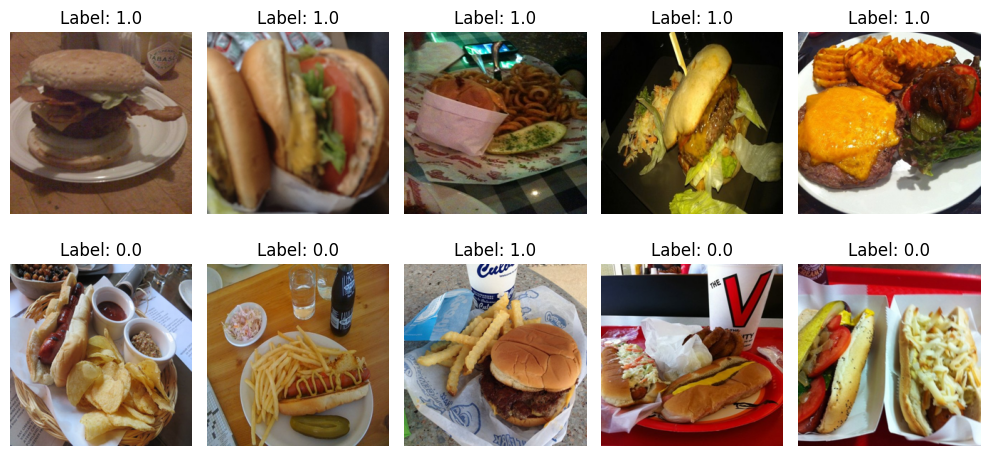

In [39]:
# Visualize the first 10 images in the dataset and printing their classification labels

def plot_images(images, labels, num_images=10):
    # Set up the figure size in inches
    plt.figure(figsize=(10, 5))

    for i in range(num_images):
        # Create a subplot for each image
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')  # Turn off axis numbering

    plt.tight_layout()
    plt.show()

plot_images(X_train, y_train)


## **Data preparation**
- Normalize the train and the test dataset by dividing by 255.

In [8]:
# Normalizing the image pixel inputs
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# Displaying the first normalized training image
print('Test Dataset:', X_test.shape, y_test.shape)
print('Training Dataset:', X_train.shape, y_train.shape)

Test Dataset: (400, 256, 256, 3) (400,)
Training Dataset: (1600, 256, 256, 3) (1600,)


In [10]:
# Displaying the first normalized testing image and its pixel values
print("Shape of the first normalized testing image:", X_test[0].shape)
print("Pixel values of the first normalized testing image:")
print(X_test[0])

Shape of the first normalized testing image: (256, 256, 3)
Pixel values of the first normalized testing image:
[[[0.12156863 0.23137255 0.31372549]
  [0.1254902  0.23529412 0.32156863]
  [0.12941176 0.25098039 0.33333333]
  ...
  [0.25490196 0.54509804 0.63921569]
  [0.26666667 0.54117647 0.64313725]
  [0.2745098  0.5372549  0.64313725]]

 [[0.1372549  0.23529412 0.32156863]
  [0.1372549  0.23921569 0.32941176]
  [0.13333333 0.24705882 0.33333333]
  ...
  [0.24313725 0.53333333 0.63529412]
  [0.25098039 0.52941176 0.63529412]
  [0.2627451  0.5254902  0.63529412]]

 [[0.14901961 0.23529412 0.3254902 ]
  [0.14901961 0.24313725 0.3372549 ]
  [0.1372549  0.25098039 0.33333333]
  ...
  [0.23921569 0.52941176 0.63529412]
  [0.24705882 0.52156863 0.63137255]
  [0.25490196 0.51372549 0.63137255]]

 ...

 [[0.4        0.65490196 0.82352941]
  [0.43529412 0.70980392 0.8745098 ]
  [0.46666667 0.76078431 0.92156863]
  ...
  [0.45098039 0.79215686 0.91372549]
  [0.47058824 0.79607843 0.92941176]
  

## **Model Building**

---
### **CNN Model - Iteration #1**

In [22]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [23]:
# Define a CNN model
model_1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
batch_size = 32
epochs = 10
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
50/50 [==============================] - 4s 48ms/step - loss: 1.1066 - accuracy: 0.6075 - val_loss: 0.6691 - val_accuracy: 0.6375
Epoch 2/10
50/50 [==============================] - 2s 37ms/step - loss: 0.4262 - accuracy: 0.8231 - val_loss: 0.6490 - val_accuracy: 0.6550
Epoch 3/10
50/50 [==============================] - 2s 37ms/step - loss: 0.2118 - accuracy: 0.9362 - val_loss: 0.7063 - val_accuracy: 0.6700
Epoch 4/10
50/50 [==============================] - 2s 37ms/step - loss: 0.0761 - accuracy: 0.9862 - val_loss: 0.7747 - val_accuracy: 0.6950
Epoch 5/10
50/50 [==============================] - 2s 37ms/step - loss: 0.0340 - accuracy: 0.9987 - val_loss: 0.9284 - val_accuracy: 0.6725
Epoch 6/10
50/50 [==============================] - 2s 37ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.9932 - val_accuracy: 0.6825
Epoch 7/10
50/50 [==============================] - 2s 37ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.0521 - val_accuracy: 0.6750
Epoch 8/10
50

In [24]:
# Evaluating on the Test dataset
evaluate_model(model_1, X_test, y_test)


13/13 [==============================] - 0s 13ms/step - loss: 1.2054 - accuracy: 0.6775
Test Loss: 1.2054485082626343
Test Accuracy: 0.6775000095367432


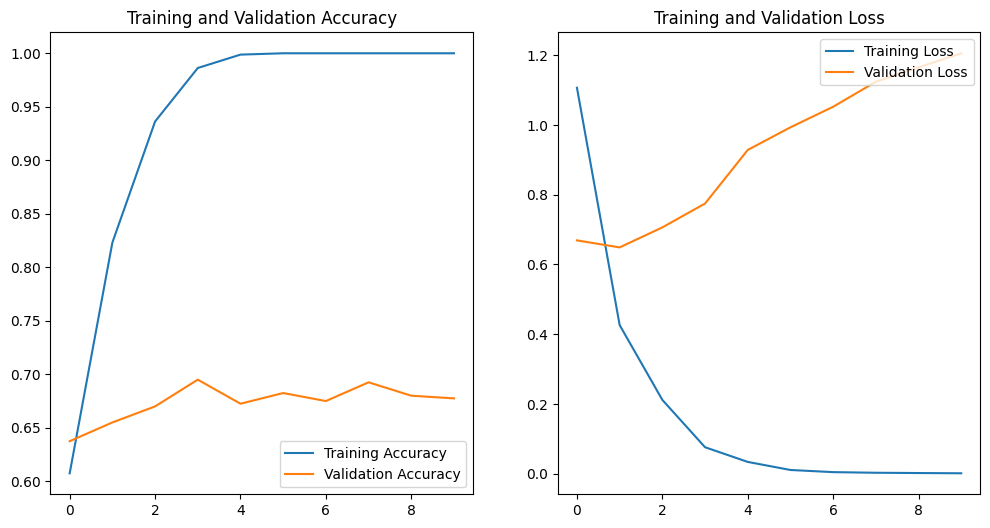

In [25]:
# Accuracy and Loss Plots
plot_training_history(history_1)

In [26]:
# Make Predictions
y_pred = model_1.predict(X_test)

# Convert probabilities to binary labels based on a 0.5 threshold
y_pred_labels = (y_pred > 0.5).astype(int)

13/13 [==============================] - 0s 12ms/step


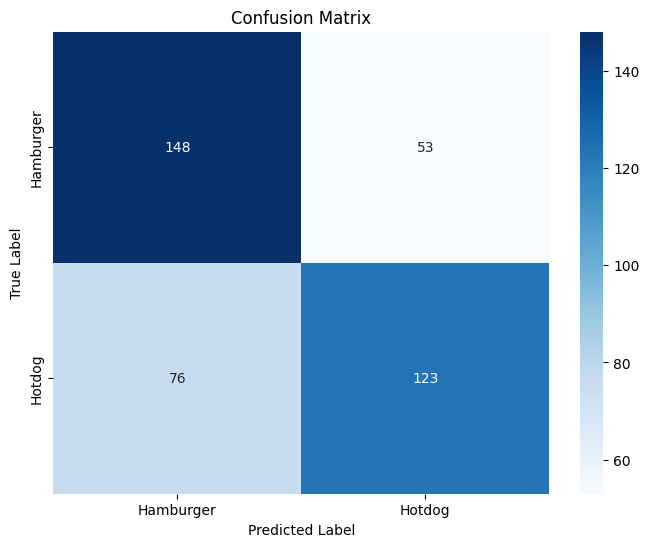

In [27]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_labels,['Hamburger', 'Hotdog'])

### **CNN Model - Iteration #2**

### Augmentation

In [15]:
# Apply augmentation to the whole training dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation (degrees)
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    shear_range=0.2,        # Shear intensity
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    vertical_flip=False,    # No vertical flip for face images
    fill_mode='nearest'     # Fill mode for handling newly created pixels
)

# Create variables to hold the X and y training data
X_train_aug = []
y_train_aug = []

# Loop through all the images.
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    label = y_train[i]

    # Ensure that the input data has the correct shape (Add batch dimension)
    img = np.expand_dims(img, axis=0)

    # Create the iterator
    it = datagen.flow(img, batch_size=1)

    # Add 5 augmented images for every original image
    for j in range(5):
        # Append a new image to the X list
        X_train_aug.append(next(it)[0])  # Correctly use next() with the iterator
        # Append the label for the original image to the y list
        y_train_aug.append(label)

# Print the length of each list
print(len(X_train_aug))
print(len(y_train_aug))


8000
8000


In [16]:
# Convert lists to numpy arrays
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

# Ensure X_train_aug is a 4D array and y_train_aug is a 1D array
print("X_train_aug shape:", X_train_aug.shape)
print("y_train_aug shape:", y_train_aug.shape)


X_train_aug shape: (8000, 256, 256, 3)
y_train_aug shape: (8000,)


In [28]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [29]:
# Define CNN model_2
model_2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
batch_size = 32
epochs = 10
history_2 = model_2.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
250/250 [==============================] - 10s 36ms/step - loss: 0.7912 - accuracy: 0.6235 - val_loss: 0.6501 - val_accuracy: 0.6625
Epoch 2/10
250/250 [==============================] - 8s 34ms/step - loss: 0.4881 - accuracy: 0.7696 - val_loss: 0.6326 - val_accuracy: 0.6875
Epoch 3/10
250/250 [==============================] - 8s 33ms/step - loss: 0.3013 - accuracy: 0.8783 - val_loss: 0.8444 - val_accuracy: 0.6425
Epoch 4/10
250/250 [==============================] - 8s 33ms/step - loss: 0.1483 - accuracy: 0.9521 - val_loss: 0.9835 - val_accuracy: 0.6750
Epoch 5/10
250/250 [==============================] - 8s 33ms/step - loss: 0.0588 - accuracy: 0.9861 - val_loss: 1.2120 - val_accuracy: 0.6700
Epoch 6/10
250/250 [==============================] - 8s 33ms/step - loss: 0.0221 - accuracy: 0.9969 - val_loss: 1.3901 - val_accuracy: 0.6725
Epoch 7/10
250/250 [==============================] - 8s 33ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 1.6289 - val_accuracy: 0.650

In [30]:
# Evaluating on the Test dataset
evaluate_model(model_2, X_test, y_test)

13/13 [==============================] - 0s 13ms/step - loss: 2.0793 - accuracy: 0.6525
Test Loss: 2.0792720317840576
Test Accuracy: 0.6524999737739563


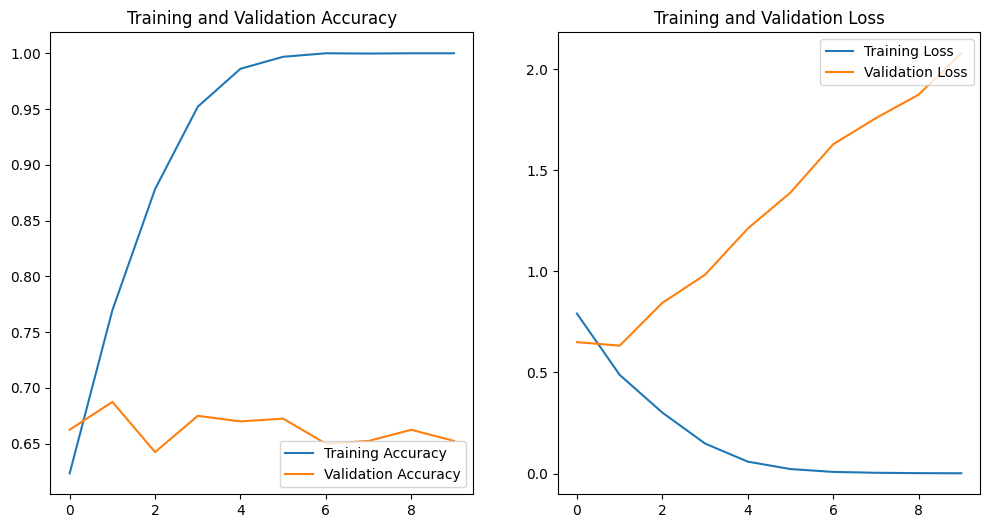

In [31]:
# Accuracy and Loss Plots
plot_training_history(history_2)

In [32]:
# Make Predictions
y_pred = model_2.predict(X_test)

# Convert probabilities to binary labels based on a 0.5 threshold
y_pred_labels = (y_pred > 0.5).astype(int)

13/13 [==============================] - 0s 12ms/step


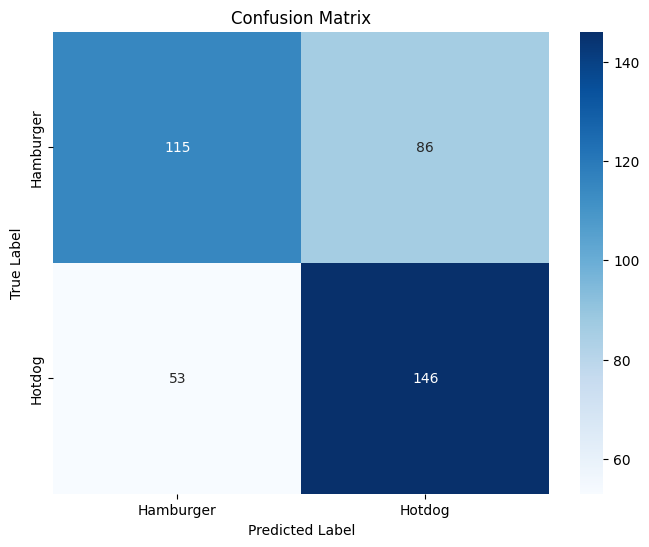

In [33]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_labels,['Hamburger', 'Hotdog'])

### **CNN Model - Iteration #3**

### Dropout
Dropout is a technique where randomly selected neurons are ignored during training, reducing the chance of overfitting.

In [34]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [35]:
from tensorflow.keras.layers import Dropout

# Define CNN model_3 with Dropout

model_3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after pooling
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Dropout layer after first dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
tf.keras.mixed_precision.set_global_policy("mixed_float16")
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Check if GPU is available
if not tf.config.list_physical_devices('GPU'):
    raise RuntimeError("No GPU device available.")

# Initialize TensorFlow session
tf.keras.backend.clear_session()

# Convert data to TensorFlow tensors
X_train_aug_v1 = tf.convert_to_tensor(X_train_aug)
y_train_aug_v1 = tf.convert_to_tensor(y_train_aug)

In [36]:
# Train the model
batch_size = 32
epochs = 10
history_3 = model_3.fit(
    X_train_aug_v1, y_train_aug_v1,
    validation_data=(X_test, y_test),
    epochs=epochs
)

Epoch 1/10
250/250 [==============================] - 10s 38ms/step - loss: 0.8771 - accuracy: 0.5685 - val_loss: 0.6643 - val_accuracy: 0.6175
Epoch 2/10
250/250 [==============================] - 9s 35ms/step - loss: 0.6181 - accuracy: 0.6716 - val_loss: 0.6307 - val_accuracy: 0.6875
Epoch 3/10
250/250 [==============================] - 9s 35ms/step - loss: 0.5185 - accuracy: 0.7526 - val_loss: 0.6795 - val_accuracy: 0.6775
Epoch 4/10
250/250 [==============================] - 9s 35ms/step - loss: 0.3797 - accuracy: 0.8324 - val_loss: 0.8361 - val_accuracy: 0.6650
Epoch 5/10
250/250 [==============================] - 9s 36ms/step - loss: 0.2598 - accuracy: 0.8955 - val_loss: 1.0155 - val_accuracy: 0.6550
Epoch 6/10
250/250 [==============================] - 9s 35ms/step - loss: 0.1872 - accuracy: 0.9279 - val_loss: 1.3519 - val_accuracy: 0.6175
Epoch 7/10
250/250 [==============================] - 9s 35ms/step - loss: 0.1397 - accuracy: 0.9498 - val_loss: 1.2129 - val_accuracy: 0.650

In [37]:
# Evaluating on the Test dataset
evaluate_model(model_3, X_test, y_test)

13/13 [==============================] - 0s 13ms/step - loss: 1.5275 - accuracy: 0.6550
Test Loss: 1.5275349617004395
Test Accuracy: 0.6549999713897705


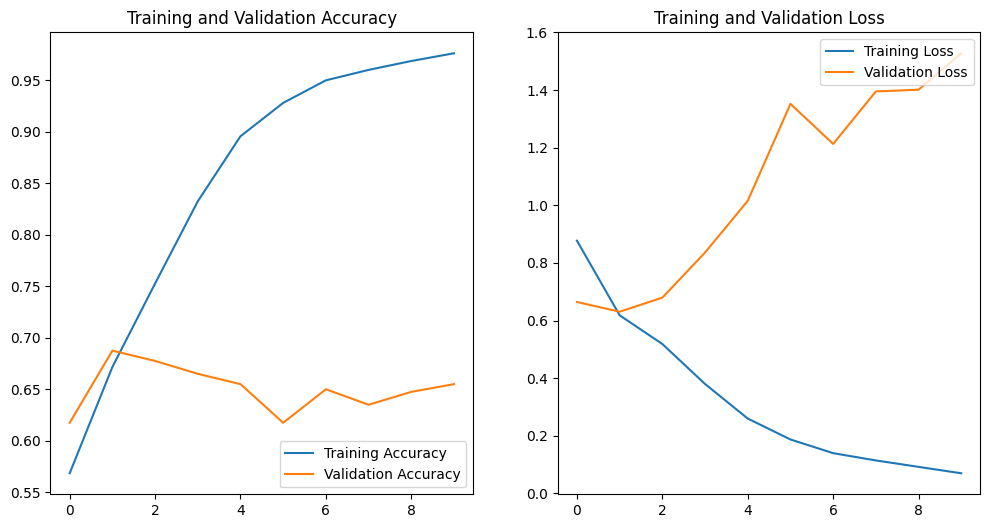

In [38]:
# Accuracy and Loss Plots
plot_training_history(history_3)


In [39]:
# Make Predictions
y_pred = model_3.predict(X_test)

# Convert probabilities to binary labels based on a 0.5 threshold
y_pred_labels = (y_pred > 0.5).astype(int)

13/13 [==============================] - 0s 12ms/step


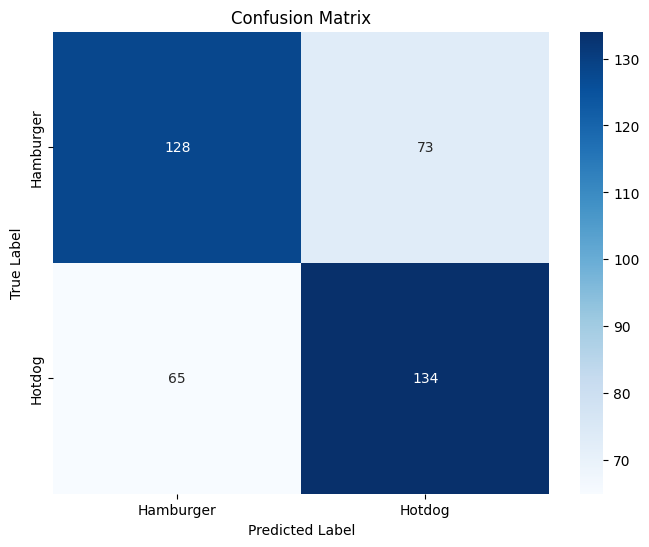

In [40]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_labels,['Hamburger', 'Hotdog'])

### **CNN Model - Iteration #4**

### Early Stopping & Dropout
Early stopping is a method to stop training when the validation metric stops improving, preventing overfitting and saving computational resources.

In [41]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [44]:
# Define a CNN model
model_4 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # Dropout layer after pooling
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Dropout layer after first dense layer
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
tf.keras.mixed_precision.set_global_policy("mixed_float16")
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Check if GPU is available
if not tf.config.list_physical_devices('GPU'):
    raise RuntimeError("No GPU device available.")

# Initialize TensorFlow session
tf.keras.backend.clear_session()

# Convert data to TensorFlow tensors
X_train_aug_v2 = tf.convert_to_tensor(X_train_aug)
y_train_aug_v2 = tf.convert_to_tensor(y_train_aug)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Verbosity mode
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

# Fit the model with early stopping
history_4 = model_4.fit(
    X_train_aug_v2, y_train_aug_v2,
    validation_data=(X_test, y_test),
    epochs=10,
    callbacks=[early_stopping]
)

In [ ]:
# Evaluating on the Test dataset
evaluate_model(model_4, X_test, y_test)

In [ ]:
# Accuracy and Loss Plots
plot_training_history(history_4)

In [ ]:
# Make Predictions
y_pred = model_4.predict(X_test)

# Convert probabilities to binary labels based on a 0.5 threshold
y_pred_labels = (y_pred > 0.5).astype(int)

In [ ]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_labels,['Hamburger', 'Hotdog'])

### **CNN Model - Iteration #5**

### Additional Layers, Increasing Neurons, Adding Batch Normalization Layers, Early Stopping & Dropout

In [11]:
### Fix the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [12]:
# Define a CNN model
model_5 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
# Compile the model
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,            # Verbosity mode
    restore_best_weights=True  # Restores model weights from the epoch with the lowest validation loss
)

# Fit the model with early stopping
history_5 = model_5.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_test, y_test),
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
250/250 [==============================] - 30s 87ms/step - loss: 2.4084 - accuracy: 0.5361 - val_loss: 20.6360 - val_accuracy: 0.5200
Epoch 2/10
250/250 [==============================] - 21s 82ms/step - loss: 0.9434 - accuracy: 0.5691 - val_loss: 64.2683 - val_accuracy: 0.5000
Epoch 3/10
250/250 [==============================] - 21s 83ms/step - loss: 0.7387 - accuracy: 0.5764 - val_loss: 0.6633 - val_accuracy: 0.5525
Epoch 4/10
250/250 [==============================] - 21s 83ms/step - loss: 0.6475 - accuracy: 0.6151 - val_loss: 0.6473 - val_accuracy: 0.6400
Epoch 5/10
250/250 [==============================] - 21s 82ms/step - loss: 0.7349 - accuracy: 0.6068 - val_loss: 0.6346 - val_accuracy: 0.6525
Epoch 6/10
250/250 [==============================] - 21s 82ms/step - loss: 0.6172 - accuracy: 0.6250 - val_loss: 0.6454 - val_accuracy: 0.5775
Epoch 7/10
250/250 [==============================] - 21s 83ms/step - loss: 0.5815 - accuracy: 0.6476 - val_loss: 0.6161 - val_accurac

In [18]:
# Evaluating on the Test dataset
evaluate_model(model_5, X_test, y_test)

13/13 [==============================] - 0s 20ms/step - loss: 0.9018 - accuracy: 0.5925
Test Loss: 0.901843249797821
Test Accuracy: 0.5924999713897705


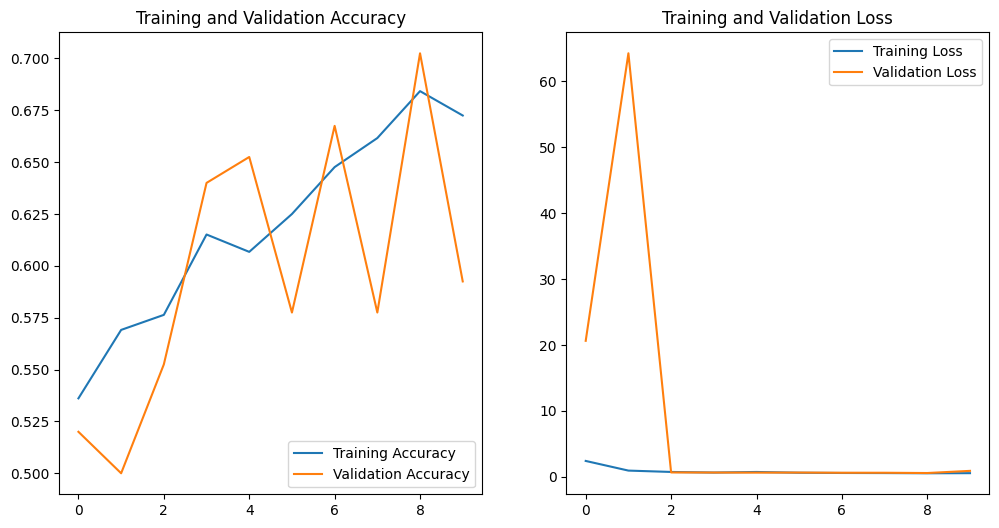

In [19]:
# Accuracy and Loss Plots
plot_training_history(history_5)

In [20]:
# Make Predictions
y_pred = model_5.predict(X_test)

# Convert probabilities to binary labels based on a 0.5 threshold
y_pred_labels = (y_pred > 0.5).astype(int)

13/13 [==============================] - 0s 19ms/step


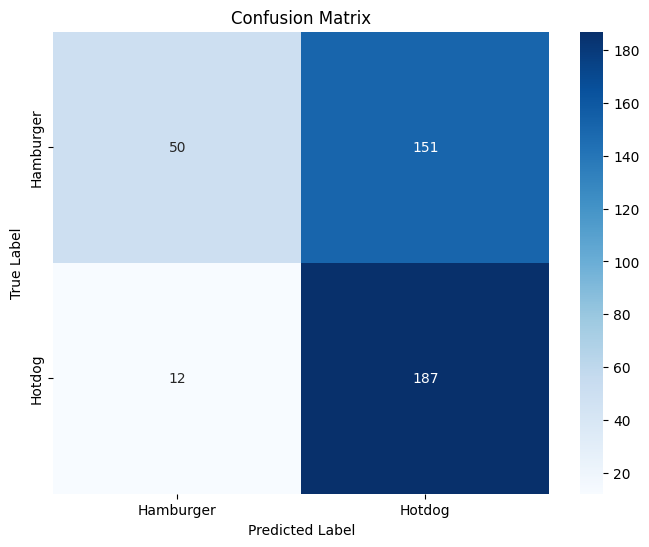

In [21]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred_labels,['Hamburger', 'Hotdog'])

### Model Comparison

In [ ]:
import pandas as pd

# Sample data structure, replace with your actual history data
data = {
    'Model': [],
    'Training Accuracy': [],
    'Validation Accuracy': [],
    'Training Loss': [],
    'Validation Loss': []
}

# Populate the DataFrame
for i in range(1, 6):
    history = eval(f'history_{i}')
    data['Model'].append(f'Model_{i}')
    data['Training Accuracy'].append(history.history['accuracy'][-1])  # Last epoch accuracy
    data['Validation Accuracy'].append(history.history['val_accuracy'][-1])  # Last epoch val_accuracy
    data['Training Loss'].append(history.history['loss'][-1])  # Last epoch loss
    data['Validation Loss'].append(history.history['val_loss'][-1])  # Last epoch val_loss

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


In [ ]:
# Plot Model Comparison Chart

# Set the aesthetic style of the plots
sns.set_style(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 7))

# Plotting Training and Validation Accuracy
plt.subplot(121)  # 1 row, 2 cols, subplot 1
ax1 = sns.barplot(x='Model', y='Training Accuracy', data=df, color='green', label='Training Accuracy')
ax2 = sns.barplot(x='Model', y='Validation Accuracy', data=df, color='orange', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Add numerical values on the bars for Accuracy
for p in ax1.patches + ax2.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:0.2f}'.format(height), ha="center")

# Plotting Training and Validation Loss
plt.subplot(122)  # 1 row, 2 cols, subplot 2
ax3 = sns.barplot(x='Model', y='Validation Loss', data=df, color='orange', label='Validation Loss')
ax4 = sns.barplot(x='Model', y='Training Loss', data=df, color='green', label='Training Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Add numerical values on the bars for Loss
for p in ax3.patches + ax4.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:0.2f}'.format(height), ha="center")

plt.show()

## Save the Trained Model

In [ ]:
from pathlib import Path
# Set the model's file path
file_path = Path("/content/Fantastic_4_Project_3/CNN_Model_4.keras")

# Export your model
model_4.save(file_path)

## Loading a Trained Model

In [ ]:
# Load the model to a new object
model_4_imported = tf.keras.models.load_model(file_path)

### Gradio App

In [ ]:
import gradio as gr

def classify_image(image):
    # Resize the image to match the input shape of the model
    image = tf.image.resize(image, (256, 256))
    # Scale image pixels to 0-1
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict
    prediction = model_4.predict(image)[0][0]

    # Convert prediction to label
    label = "Hotdog" if prediction > 0.5 else "Hamburger"
    return label

# Adjust Gradio interface accordingly
iface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs="text",
    title="Hamburger or Hotdog Classifier",
    description="Upload an image to see if it's a hamburger or hotdog."
)

# Launch the interface
iface.launch(share=True)
